In [1]:
from mplsoccer.pitch import Pitch, VerticalPitch
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from highlight_text import HighlightText, ax_text, fig_text
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
import matplotlib.patheffects as path_effects

In [2]:
data = pd.read_csv("Top_5_Leagues_23_24.csv" , low_memory=False)
data['x'] = data['x']*1.2
data['y'] = data['y']*.8
data['endX'] = data['endX']*1.2
data['endY'] = data['endY']*.8

In [3]:
data_def_aerials_w = data[(data['type'] == 'Aerial') & (data['outcomeType'] == 'Successful') & (data['x'] <= 60)]
data_def_aerials_l = data[(data['type'] == 'Aerial') & (data['outcomeType'] == 'Unsuccessful') & (data['x'] <= 60)]

In [71]:
aerials_won_grouped = data_def_aerials_w.groupby(['playerId', 'player', 'team']).size().reset_index(name='aerials_won')
aerials_lost_grouped = data_def_aerials_l.groupby(['playerId', 'player', 'team']).size().reset_index(name='aerials_lost')

aerials_df = pd.merge(aerials_won_grouped, aerials_lost_grouped, on=['playerId', 'player', 'team'], how='outer').fillna(0)

aerials_df['total_aerials'] = aerials_df['aerials_won'] + aerials_df['aerials_lost']
aerials_df['aerials_won_pct'] = (aerials_df['aerials_won'] / aerials_df['total_aerials']) * 100


info = pd.read_csv("T5 Leagues Mins 23-24.csv")
info['90s'] = info['Mins'] / 90
info['player'] = info['player'].str.strip().str.upper()
aerials_df['player'] = aerials_df['player'].str.strip().str.upper()

merged_aerials_df = pd.merge(aerials_df, info, on=['player', 'team'], how='left')

merged_aerials_df = merged_aerials_df[['playerId', 'player', 'team', 'aerials_won', 'aerials_lost', 'total_aerials', 'aerials_won_pct', '90s', 'Mins', 'age', 'position']]
merged_aerials_df['aerials_p90'] = merged_aerials_df['total_aerials'] / merged_aerials_df['90s']
merged_aerials_df = merged_aerials_df[(merged_aerials_df['90s'] >= 12) & (merged_aerials_df['position'] != 'GK')
                                     & (merged_aerials_df['age'] <= 23)]

merged_aerials_df = merged_aerials_df[merged_aerials_df['aerials_p90'] >= 2]
top_12_aerials = merged_aerials_df.sort_values("aerials_won_pct", ascending=False).head(20)

In [72]:
top_12_aerials

,playerId,player,team,aerials_won,aerials_lost,total_aerials,aerials_won_pct,90s,Mins,age,position,aerials_p90
2158,457292.0,FORMOSE MENDY,Lorient,32.0,11.0,43.0,74.418605,13.944444,1255.0,23.0,D(C),3.083665
1588,386519.0,RICCARDO CALAFIORI,Bologna,46.0,16.0,62.0,74.193548,25.977778,2338.0,22.0,D(CL),2.386655
1539,381045.0,JARRAD BRANTHWAITE,Everton,74.0,26.0,100.0,74.000000,34.633333,3117.0,21.0,D(C),2.887392
2000,430019.0,JARELL QUANSAH,Liverpool,36.0,13.0,49.0,73.469388,13.222222,1190.0,21.0,D(C),3.705882
2105,445322.0,JUAN CABAL,Verona,44.0,16.0,60.0,73.333333,16.633333,1497.0,23.0,D(L),3.607214
1635,393355.0,MALICK THIAW,AC Milan,30.0,12.0,42.0,71.428571,18.011111,1621.0,22.0,D(C),2.331894
1808,405133.0,GIORGIO SCALVINI,Atalanta,60.0,24.0,84.0,71.428571,28.400000,2556.0,20.0,D(C),2.957746
1263,351705.0,SEPP VAN DEN BERG,Mainz,131.0,55.0,186.0,70.430108,31.544444,2839.0,22.0,"D(CR),M(R)",5.896442
1457,371063.0,WILFRIED SINGO,Monaco,47.0,20.0,67.0,70.149254,24.300000,2187.0,23.0,"D(CR),M(R)",2.757202
1999,429683.0,DIEGO COPPOLA,Verona,62.0,29.0,91.0,68.131868,18.177778,1636.0,20.0,D(C),5.006112


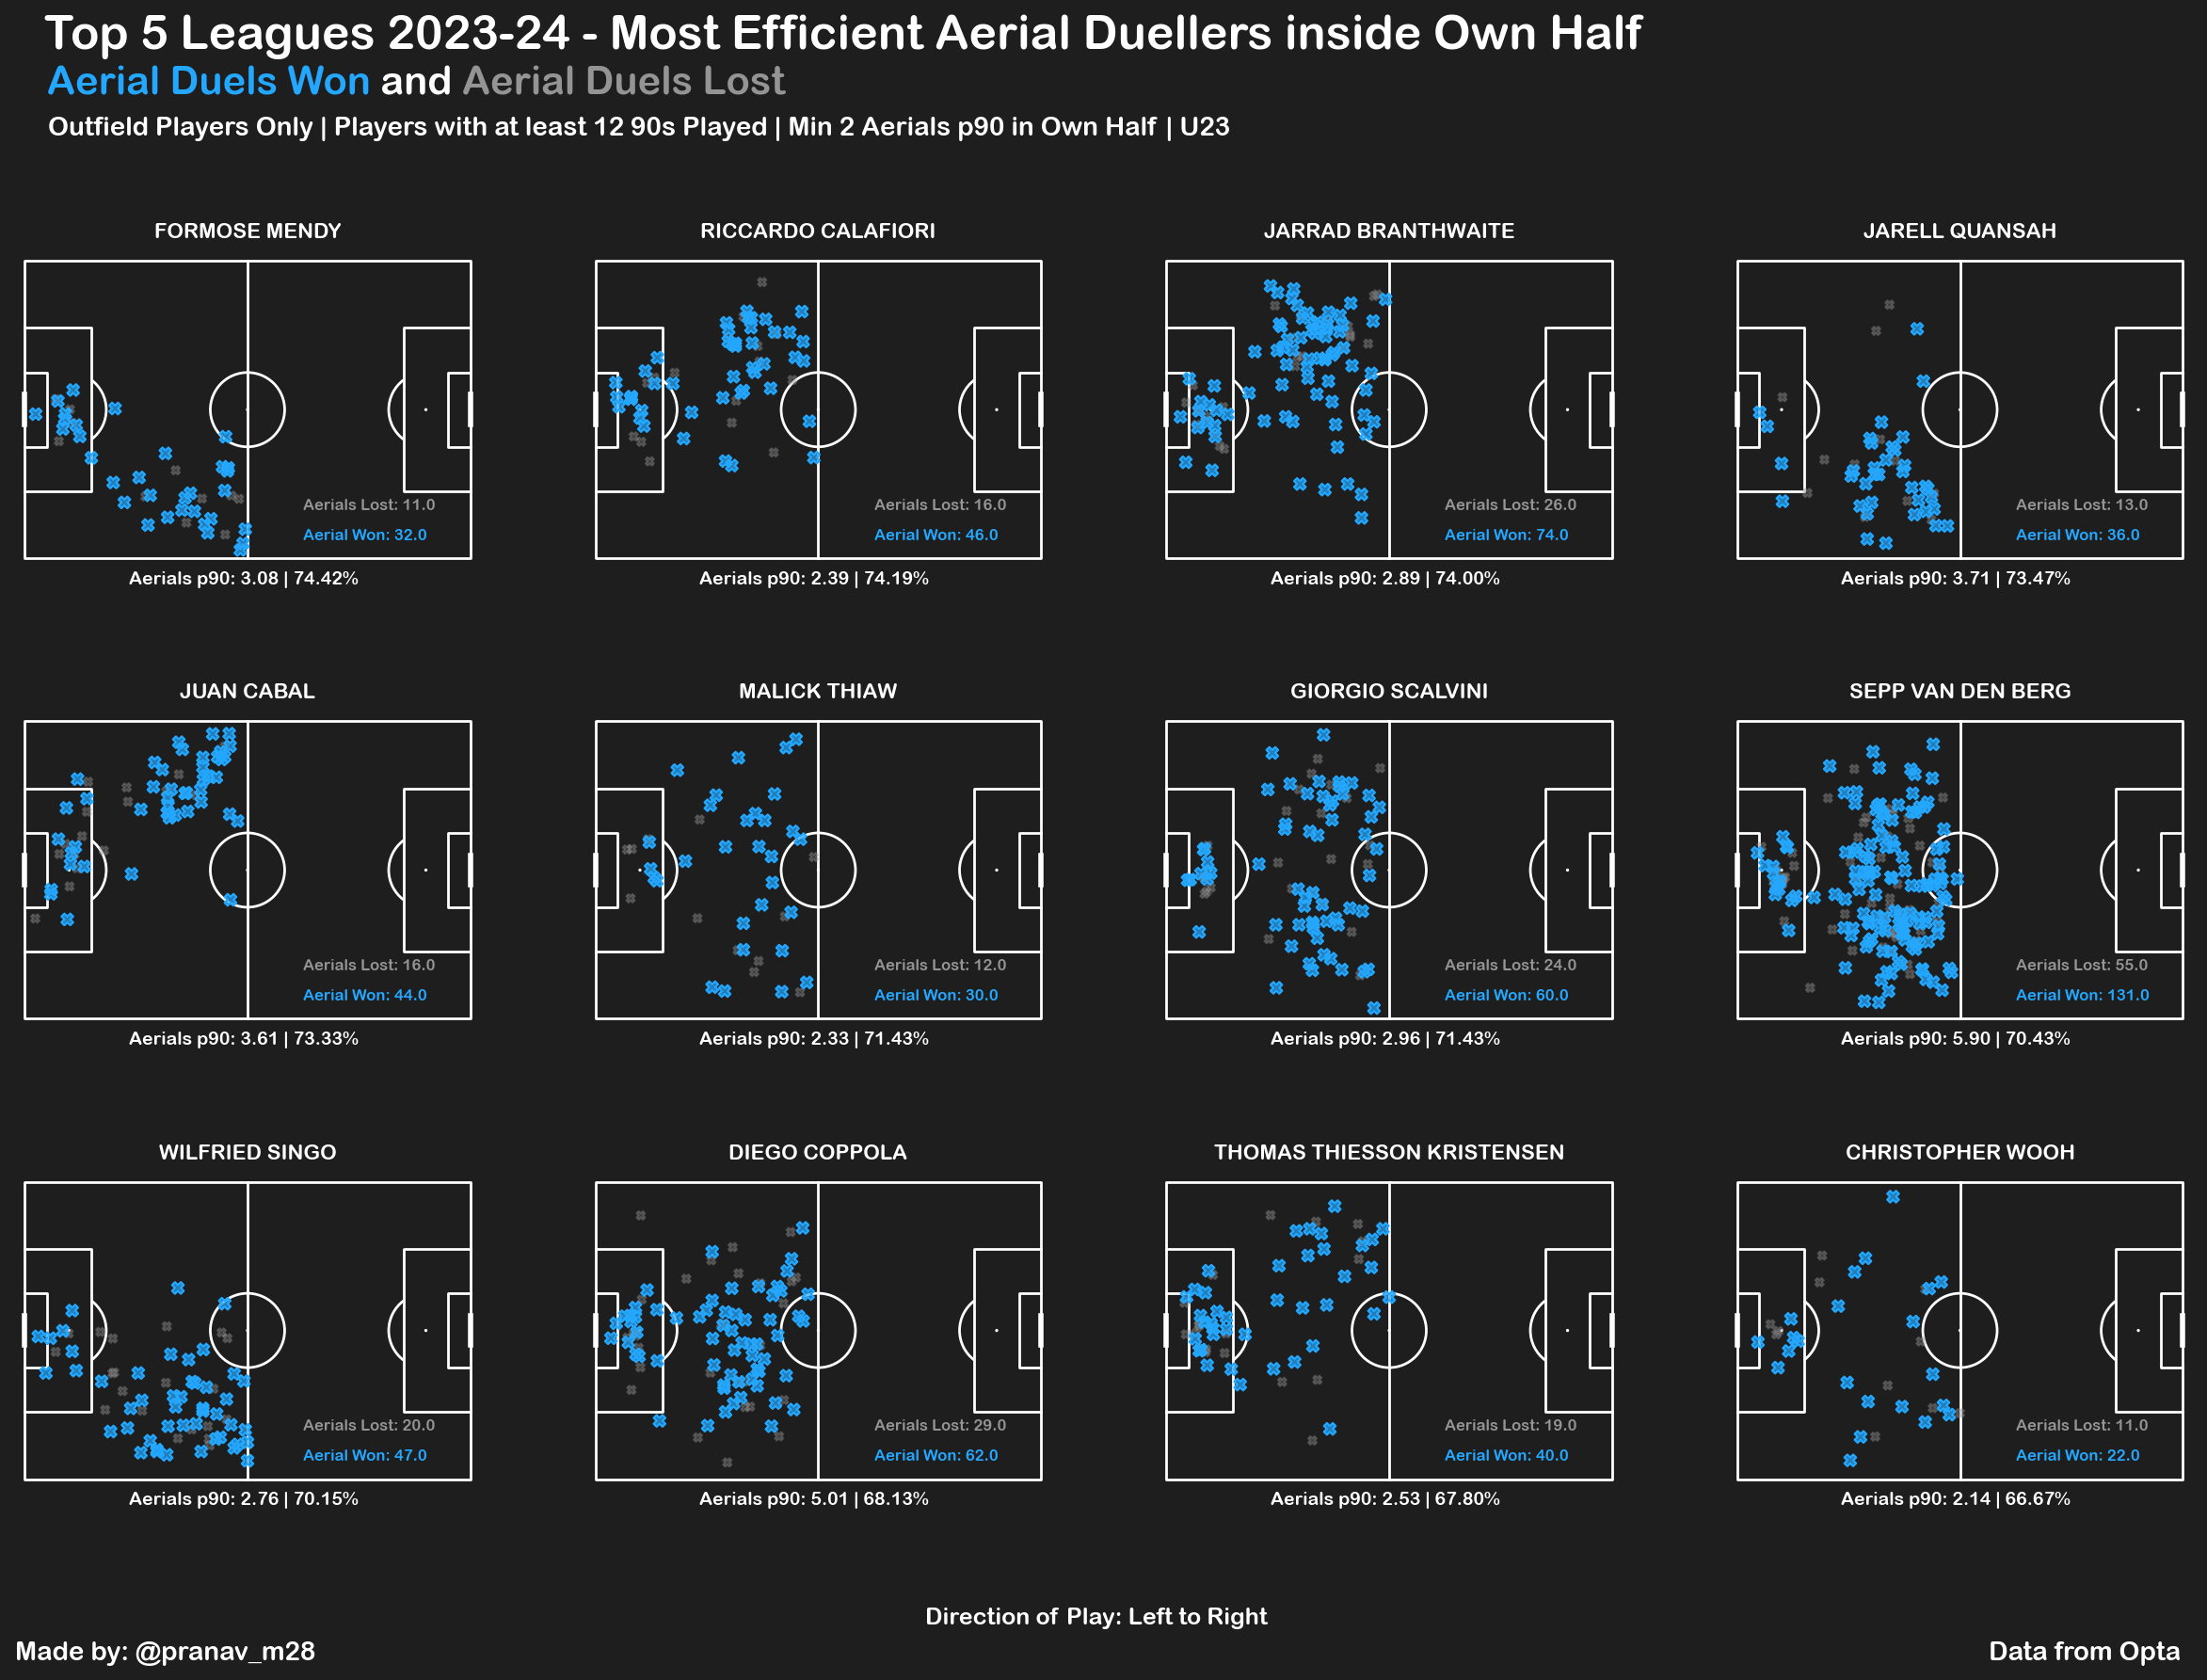

In [70]:
fig, axs = plt.subplots(3, 4, figsize=(30, 18))
fig.set_facecolor('#1e1e1e')

for ax, (_, player_data) in zip(axs.flatten(), top_12_aerials.iterrows()):
    player_id = player_data['playerId']
    player_name = player_data['player']
    aerials_won_count = player_data['aerials_won']
    aerials_lost_count = player_data['aerials_lost']
    aerials_p90 = player_data['aerials_p90']
    aerials_won_pct = player_data['aerials_won_pct']

    player_aerials_won = data_def_aerials_w[data_def_aerials_w['playerId'] == player_id]
    player_aerials_lost = data_def_aerials_l[data_def_aerials_l['playerId'] == player_id]

    pitch = Pitch(pitch_type='statsbomb', pitch_color='#1e1e1e', line_color='#FFFFFF')
    pitch.draw(ax=ax)

    # Plot Aerials Won
    pitch.scatter(player_aerials_won.x, player_aerials_won.y, s=80,
              marker='X', edgecolors='#24a8ff', c='none', zorder=4, ax=ax , alpha=1 , ls='-' , lw=1.6)

    pitch.scatter(player_aerials_won.x, player_aerials_won.y, s=80,
              marker='X', edgecolors='none', c='#24a8ff', zorder=4, ax=ax , alpha=0.70)

    # Plot Aerials Lost
    pitch.scatter(player_aerials_lost.x, player_aerials_lost.y, s=40,
              marker='X', edgecolors='#949494', c='none', zorder=3, ax=ax , alpha=0.4 , ls='-' , lw=1.6)

    pitch.scatter(player_aerials_lost.x, player_aerials_lost.y, s=40,
              marker='X', edgecolors='none', c='#949494', zorder=3, ax=ax , alpha=0.25)

    ax.invert_yaxis()
    ax.set_title(f'{player_name}', font='Arial Rounded MT Bold', color='#FFFFFF', fontsize=16)

    ax.text(75, 5, f'Aerial Won: {aerials_won_count}', color='#24A8FF', font='Arial Rounded MT Bold', fontsize=12, ha='left')
    ax.text(75, 13, f'Aerials Lost: {aerials_lost_count}', font='Arial Rounded MT Bold', color='#949494', fontsize=12, ha='left')
    ax.text(28, -7, f'Aerials p90: {aerials_p90:.2f} | {aerials_won_pct:.2f}%', font='Arial Rounded MT Bold', color='#FFFFFF', fontsize=14, ha='left')

fig_text(0.42, 1.00, "Top 5 Leagues 2023-24 - Most Efficient Aerial Duellers inside Own Half", ha="center", font='Arial Rounded MT Bold', color="#FFFFFF", fontsize=36, fontweight='bold')
fig_text(0.269, 0.97, "<Aerial Duels Won> and <Aerial Duels Lost>", ha="center", font='Arial Rounded MT Bold', color="#FFFFFF", fontsize=30, fontweight='bold', highlight_textprops=[{"color": '#24A8FF'}, {"color": '#949494'}])
fig_text(0.348, 0.94, "Outfield Players Only | Players with at least 12 90s Played | Min 2 Aerials p90 in Own Half | U23", ha="center", font='Arial Rounded MT Bold', color="#FFFFFF", fontsize=20, fontweight='bold')


fig_text(0.18, 0.04, "Made by: @pranav_m28", ha="center", font='Arial Rounded MT Bold' ,color="#FFFFFF", fontsize=20, fontweight='bold')
fig_text(0.86, 0.04, "Data from Opta", ha="center", font='Arial Rounded MT Bold' ,color="#FFFFFF", fontsize=20, fontweight='bold')


fig_text(
    0.510, 0.060, "Direction of Play: Left to Right", font='Arial Rounded MT Bold' , size=18,
    ha="center", color="#FFFFFF" , fontweight='bold'
)

#plt.savefig("Defensive_Aerials_Top12_T5_U23.png", dpi=300, bbox_inches='tight')

plt.show()